In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("Data\Cleaned_data.csv")
#df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date_converted,Date_time,Total_meter_reading
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,2006-12-16 17:24:00,18.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,2006-12-16 17:25:00,17.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,2006-12-16 17:26:00,19.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,2006-12-16 17:27:00,18.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16,2006-12-16 17:28:00,18.0


In [3]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Date_converted', 'Date_time', 'Total_meter_reading'],
      dtype='object')

In [4]:
new_df=df.drop(["Date","Time","Sub_metering_1","Sub_metering_2","Sub_metering_2","Sub_metering_3"],axis=1)

In [5]:
new_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Date_converted,Date_time,Total_meter_reading
0,4.216,0.418,234.84,18.4,2006-12-16,2006-12-16 17:24:00,18.0
1,5.360,0.436,233.63,23.0,2006-12-16,2006-12-16 17:25:00,17.0
2,5.374,0.498,233.29,23.0,2006-12-16,2006-12-16 17:26:00,19.0
3,5.388,0.502,233.74,23.0,2006-12-16,2006-12-16 17:27:00,18.0
4,3.666,0.528,235.68,15.8,2006-12-16,2006-12-16 17:28:00,18.0


In [6]:
new_df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_meter_reading
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.847252
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.180690
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.345416
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.844330
Total_meter_reading,0.847252,0.180690,-0.345416,0.844330,1.000000


In [7]:
new_df.skew(numeric_only=True)

Global_active_power      1.786233
Global_reactive_power    1.261914
Voltage                 -0.326665
Global_intensity         1.849100
Total_meter_reading      2.228822
dtype: float64

- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

- If the skewness is between -1 and - 0.5 or between 0.5 and 1, the data are moderately skewed

- If the skewness is less than -1 or greater than 1, the data are highly skewed

In [8]:
new_df.kurtosis(numeric_only=True)

Global_active_power      4.218685
Global_reactive_power    2.605633
Voltage                  0.724707
Global_intensity         4.601243
Total_meter_reading      7.341440
dtype: float64

- Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier

- Kurtosis describes the peakedness of the distribution.

- If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). 
   Values in a leptokurtic distribution are near the mean or at the extremes.

- A flat distribution where the values are moderately spread out    
   (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

- A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a 
   mesokurtic(Kurtosis=3) distribution.

   A mesokurtic distribution looks more close to a normal distribution.

- Kurtosis is sometimes reported as “excess kurtosis.” Excess kurtosis is determined by subtracting 3 from the kurtosis. 
  This makes the normal distribution kurtosis equal 0.

Important Notes:

· Along with skewness, kurtosis is an important descriptive statistic of data distribution. However, the two concepts must not be confused with each other. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

· It is the sharpness of the peak of a frequency-distribution curve .It is actually the measure of outliers present in the distribution.

· High kurtosis in a data set is an indicator that data has heavy outliers.

· Low kurtosis in a data set is an indicator that data has lack of outliers.

· If kurtosis value + means pointy and — means flat.

<AxesSubplot:>

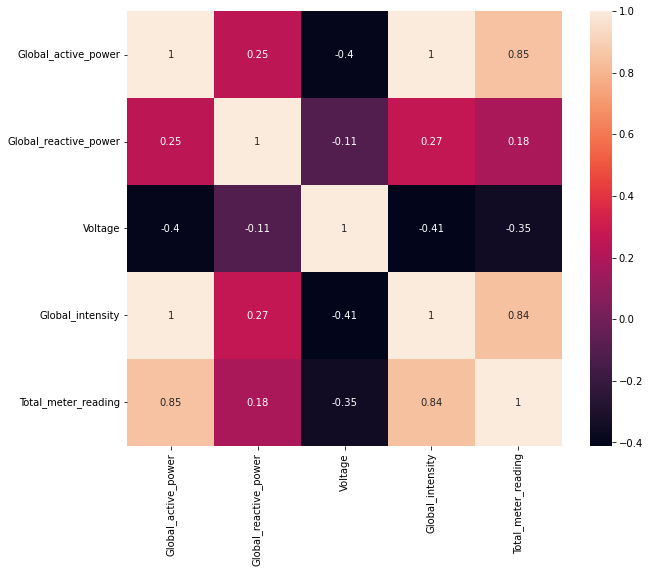

In [9]:
plt.figure(figsize=(10,8))
# creating mask
mask = np.triu(np.ones_like(new_df.corr()))
#sns.heatmap(new_df.corr(),annot=True,square=True,mask=mask)
sns.heatmap(new_df.corr(),annot=True,square=True,)

In [10]:
# Here we can drop Either Global Active Power or Global Intennsity s both the features are intercorrlated

Text(0, 0.5, 'Global_active_power')

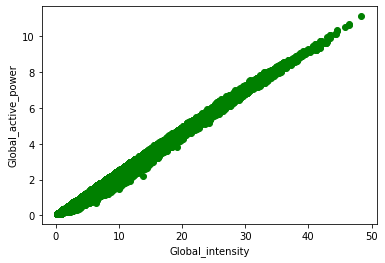

In [11]:
plt.scatter(new_df['Global_intensity'],new_df["Global_active_power"],c="g")
plt.xlabel("Global_intensity")
plt.ylabel("Global_active_power")


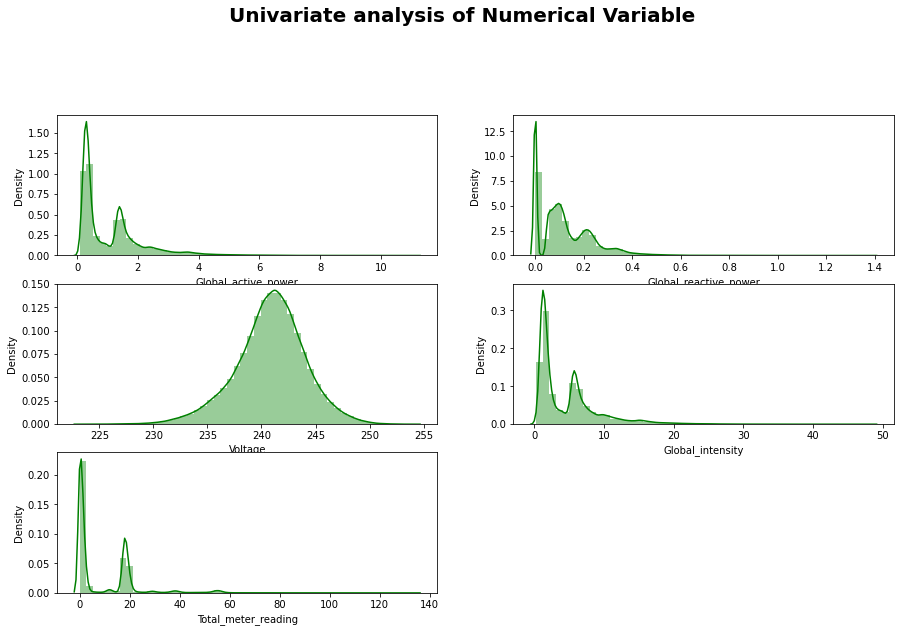

In [12]:

#Univariate Analysis on Numerical feature
num_col=['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity','Total_meter_reading']
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numerical Variable', fontsize=20, fontweight='bold')

for i in range (0, len(num_col)):
    plt.subplot(5,2,i+1)
    sns.distplot(new_df[num_col[i]], color='g')
    plt.xlabel(num_col[i])

In [13]:
new_df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Date_converted,Date_time,Total_meter_reading
0,4.216,0.418,234.84,18.4,2006-12-16,2006-12-16 17:24:00,18.0
1,5.360,0.436,233.63,23.0,2006-12-16,2006-12-16 17:25:00,17.0
2,5.374,0.498,233.29,23.0,2006-12-16,2006-12-16 17:26:00,19.0
3,5.388,0.502,233.74,23.0,2006-12-16,2006-12-16 17:27:00,18.0
4,3.666,0.528,235.68,15.8,2006-12-16,2006-12-16 17:28:00,18.0
...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,2010-11-26,2010-11-26 20:58:00,0.0
2049276,0.944,0.000,240.00,4.0,2010-11-26,2010-11-26 20:59:00,0.0
2049277,0.938,0.000,239.82,3.8,2010-11-26,2010-11-26 21:00:00,0.0
2049278,0.934,0.000,239.70,3.8,2010-11-26,2010-11-26 21:01:00,0.0


In [14]:
new_df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Date_converted', 'Date_time',
       'Total_meter_reading'],
      dtype='object')

In [15]:
new_df.drop('Global_active_power',axis=1,inplace=True)


In [16]:
new_df

,Global_reactive_power,Voltage,Global_intensity,Date_converted,Date_time,Total_meter_reading
0,0.418,234.84,18.4,2006-12-16,2006-12-16 17:24:00,18.0
1,0.436,233.63,23.0,2006-12-16,2006-12-16 17:25:00,17.0
2,0.498,233.29,23.0,2006-12-16,2006-12-16 17:26:00,19.0
3,0.502,233.74,23.0,2006-12-16,2006-12-16 17:27:00,18.0
4,0.528,235.68,15.8,2006-12-16,2006-12-16 17:28:00,18.0
...,...,...,...,...,...,...
2049275,0.000,240.43,4.0,2010-11-26,2010-11-26 20:58:00,0.0
2049276,0.000,240.00,4.0,2010-11-26,2010-11-26 20:59:00,0.0
2049277,0.000,239.82,3.8,2010-11-26,2010-11-26 21:00:00,0.0
2049278,0.000,239.70,3.8,2010-11-26,2010-11-26 21:01:00,0.0


In [17]:
new_df.duplicated().sum()

0

In [18]:
#sns.jointplot("Global_active_power","Total_meter_reading",data=new_df,kind="kde")

In [19]:
memory_usage = new_df.memory_usage(deep=True) / 1024 ** 2
memory_usage

Index                      0.000122
Global_reactive_power     15.634766
Voltage                   15.634766
Global_intensity          15.634766
Date_converted           130.941162
Date_time                148.530273
Total_meter_reading       15.634766
dtype: float64

In [20]:
memory_usage.sum()

342.0106201171875

In [21]:
memory_usage.view

<bound method Series.view of Index                      0.000122
Global_reactive_power     15.634766
Voltage                   15.634766
Global_intensity          15.634766
Date_converted           130.941162
Date_time                148.530273
Total_meter_reading       15.634766
dtype: float64>

In [22]:
new_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 6 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_reactive_power  float64
 1   Voltage                float64
 2   Global_intensity       float64
 3   Date_converted         object 
 4   Date_time              object 
 5   Total_meter_reading    float64
dtypes: float64(4), object(2)
memory usage: 342.0 MB


In [23]:
new_df['Date_converted']=pd.to_datetime(df['Date_converted'])
new_df['Date_time'] =pd.to_datetime(df['Date_time'])
new_df.dtypes

Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Date_converted           datetime64[ns]
Date_time                datetime64[ns]
Total_meter_reading             float64
dtype: object

In [24]:
new_df.Date_time.dtypes

dtype('<M8[ns]')

In [25]:
import datetime as dt

In [26]:
new_df.Date_converted.unique

<bound method Series.unique of 0         2006-12-16
1         2006-12-16
2         2006-12-16
3         2006-12-16
4         2006-12-16
             ...    
2049275   2010-11-26
2049276   2010-11-26
2049277   2010-11-26
2049278   2010-11-26
2049279   2010-11-26
Name: Date_converted, Length: 2049280, dtype: datetime64[ns]>

In [27]:
new_df.Date_converted.astype('datetime64[ns]')

0         2006-12-16
1         2006-12-16
2         2006-12-16
3         2006-12-16
4         2006-12-16
             ...    
2049275   2010-11-26
2049276   2010-11-26
2049277   2010-11-26
2049278   2010-11-26
2049279   2010-11-26
Name: Date_converted, Length: 2049280, dtype: datetime64[ns]

In [28]:
new_df.Date_converted.dtypes

dtype('<M8[ns]')

In [29]:
new_df.to_csv("Data\Processed_data.csv",index=False)

In [30]:
df=pd.read_csv('Data\Processed_data.csv',parse_dates=['Date_converted','Date_time'],)
df

,Global_reactive_power,Voltage,Global_intensity,Date_converted,Date_time,Total_meter_reading
0,0.418,234.84,18.4,2006-12-16,2006-12-16 17:24:00,18.0
1,0.436,233.63,23.0,2006-12-16,2006-12-16 17:25:00,17.0
2,0.498,233.29,23.0,2006-12-16,2006-12-16 17:26:00,19.0
3,0.502,233.74,23.0,2006-12-16,2006-12-16 17:27:00,18.0
4,0.528,235.68,15.8,2006-12-16,2006-12-16 17:28:00,18.0
...,...,...,...,...,...,...
2049275,0.000,240.43,4.0,2010-11-26,2010-11-26 20:58:00,0.0
2049276,0.000,240.00,4.0,2010-11-26,2010-11-26 20:59:00,0.0
2049277,0.000,239.82,3.8,2010-11-26,2010-11-26 21:00:00,0.0
2049278,0.000,239.70,3.8,2010-11-26,2010-11-26 21:01:00,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_reactive_power  float64       
 1   Voltage                float64       
 2   Global_intensity       float64       
 3   Date_converted         datetime64[ns]
 4   Date_time              datetime64[ns]
 5   Total_meter_reading    float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 93.8 MB


In [32]:
df['Month'] =df["Date_converted"].dt.month
df['Year'] =df['Date_converted'].dt.year

In [33]:
df.Month.value_counts()

5     177114
10    176990
7     176986
3     175090
1     174472
12    171200
8     169001
6     168049
4     167634
9     166079
11    165418
2     161247
Name: Month, dtype: int64

In [34]:
df.Year.value_counts()

2008    526905
2007    521669
2009    521320
2010    457394
2006     21992
Name: Year, dtype: int64